In [ ]:
import face_alignment
from skimage import io
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import copy
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"



In [ ]:
def close_mouth(landmarks):
    # 深拷贝以防止修改原始 landmarks
    modified_landmarks = copy.deepcopy(landmarks)

    # 嘴部关键点索引
    outer_mouth_indices = range(48, 60)  # 外嘴轮廓
    inner_mouth_indices = range(60, 68)  # 内嘴轮廓

    # 计算内嘴轮廓的中心点
    inner_mouth_points = landmarks[0][inner_mouth_indices]
    center = np.mean(inner_mouth_points, axis=0)

    # 收缩因子
    lambda_outer = 0.3  # 外嘴轮廓收缩程度
    lambda_inner = 0.1  # 内嘴轮廓收缩程度

    # 调整外嘴轮廓
    for i in outer_mouth_indices:
        modified_landmarks[0][i] = center + lambda_outer * (landmarks[0][i] - center)

    # 调整内嘴轮廓
    for i in inner_mouth_indices:
        modified_landmarks[0][i] = center + lambda_inner * (landmarks[0][i] - center)

    return modified_landmarks

In [ ]:
def close_mouth(landmarks):
    # 深拷贝以防止修改原始 landmarks
    modified_landmarks = copy.deepcopy(landmarks)

    # 嘴部关键点索引
    outer_mouth_indices = range(48, 60)  # 外嘴轮廓
    inner_mouth_indices = range(60, 68)  # 内嘴轮廓

    # 计算内嘴轮廓的中心点
    inner_mouth_points = landmarks[0][inner_mouth_indices]
    center = np.mean(inner_mouth_points, axis=0)

    # 动态收缩因子（基于嘴巴的开口大小）
    mouth_height = np.max(inner_mouth_points[:, 1]) - np.min(inner_mouth_points[:, 1])
    lambda_outer = 0.8   # 随开口大小动态调整
    lambda_inner = 0.3  

    # 额外垂直压缩因子
    vertical_compression = 0.2  # 垂直方向收缩比例

    # 调整外嘴轮廓
    for i in outer_mouth_indices:
        modified_landmarks[0][i] = center + lambda_outer * (landmarks[0][i] - center)
        # 垂直方向额外压缩
        modified_landmarks[0][i][1] = center[1] + vertical_compression * (landmarks[0][i][1] - center[1])

    # 调整内嘴轮廓
    for i in inner_mouth_indices:
        modified_landmarks[0][i] = center + lambda_inner * (landmarks[0][i] - center)
        # 垂直方向额外压缩
        modified_landmarks[0][i][1] = center[1] + vertical_compression * (landmarks[0][i][1] - center[1])

    return modified_landmarks


In [ ]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False)

input = io.imread('OIP.jpg')
# input = cv2.resize(input, (256, 256), interpolation=cv2.INTER_LINEAR)
landmarks = fa.get_landmarks(input)
print(input.shape)

In [ ]:
modified_landmarks = copy.deepcopy(landmarks)

# 嘴部关键点索引
outer_mouth_indices = range(48, 60)  # 外嘴轮廓
inner_mouth_indices = range(60, 68)  # 内嘴轮廓

# 计算内嘴轮廓的中心点
inner_mouth_points = landmarks[0][inner_mouth_indices]
center = np.mean(inner_mouth_points, axis=0)

# 收缩因子
lambda_outer = 1  # 外嘴轮廓收缩程度
lambda_inner = 1  # 内嘴轮廓收缩程度

# 调整外嘴轮廓
for i in outer_mouth_indices:
    modified_landmarks[0][i] = center + lambda_outer * (landmarks[0][i] - center)

# 调整内嘴轮廓
for i in inner_mouth_indices:
    modified_landmarks[0][i] = center + lambda_inner * (landmarks[0][i] - center)

modified_landmarks

In [ ]:
# output = io.imshow(preds[0])
output_origin = input.copy()
if landmarks:
    for face in landmarks[0]:
        x, y = face  # 提取坐标
        output_origin = cv2.circle(output_origin, (int(x), int(y)), radius=2, color=(255, 0, 0), thickness=-1)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(output_origin)
plt.show()

In [ ]:
def open_laugh(landmarks):
    """
    根据原始嘴部关键点生成开怀大笑的嘴型。

    Parameters:
    - landmarks: numpy.ndarray, 原始关键点数组，形状 (1, 68, 2)。

    Returns:
    - modified_landmarks: numpy.ndarray, 修改后的关键点数组，形状与输入相同。
    """
    import numpy as np
    import copy

    # 深拷贝，避免修改原始 landmarks
    modified_landmarks = copy.deepcopy(landmarks)

    # 嘴部关键点索引
    outer_mouth_indices = range(48, 60)  # 外嘴轮廓
    inner_mouth_indices = range(60, 68)  # 内嘴轮廓

     # 左右眼关键点索引
    left_eye_indices = range(36, 42)  # 左眼轮廓
    right_eye_indices = range(42, 48)  # 右眼轮廓

    # 计算嘴部中心点
    outer_mouth_points = landmarks[0][outer_mouth_indices]
    inner_mouth_points = landmarks[0][inner_mouth_indices]
    center = np.mean(inner_mouth_points, axis=0)

    # 扩张因子
    lambda_outer = 1.5  # 外嘴轮廓扩张程度
    lambda_inner = 1.5  # 内嘴轮廓扩张程度

    # 上扬因子（微调嘴角）
    smile_lift = 0.8  # 嘴角上扬幅度

    # 调整外嘴轮廓
    for i in outer_mouth_indices:
        # 扩张
        modified_landmarks[0][i] = center + lambda_outer * (landmarks[0][i] - center)
        # 嘴角上扬（48:左嘴角，54:右嘴角）
        if i in [48, 54]:
            modified_landmarks[0][i][1] -= smile_lift * np.abs(landmarks[0][i][1] - center[1])

    # 调整内嘴轮廓
    for i in inner_mouth_indices:
        # 扩张
        modified_landmarks[0][i] = center + lambda_inner * (landmarks[0][i] - center)


    eye_compression = 0.7  # 眼睛高度收缩因子（小于 1）
    eye_lift = 0.8  # 眼角上扬幅度

    # 扩大嘴巴整体宽度（横向拉伸）
    mouth_width_factor = 0.3
    for i in outer_mouth_indices:
        modified_landmarks[0][i][0] += mouth_width_factor * (landmarks[0][i][0] - center[0])
    for i in inner_mouth_indices:
        modified_landmarks[0][i][0] += mouth_width_factor * (landmarks[0][i][0] - center[0])


    left_eye_points = landmarks[0][left_eye_indices]
    left_eye_center = np.mean(left_eye_points, axis=0)
    for i in left_eye_indices:
        # 垂直压缩
        modified_landmarks[0][i][1] = left_eye_center[1] + eye_compression * (landmarks[0][i][1] - left_eye_center[1])
        # 眼角上扬（36:左眼左角，39:左眼右角）
        if i in [36, 39]:
            modified_landmarks[0][i][1] -= eye_lift

    # 调整右眼
    right_eye_points = landmarks[0][right_eye_indices]
    right_eye_center = np.mean(right_eye_points, axis=0)
    for i in right_eye_indices:
        # 垂直压缩
        modified_landmarks[0][i][1] = right_eye_center[1] + eye_compression * (landmarks[0][i][1] - right_eye_center[1])
        # 眼角上扬（42:右眼左角，45:右眼右角）
        if i in [42, 45]:
            modified_landmarks[0][i][1] -= eye_lift

    return modified_landmarks


In [67]:
def open_laugh(landmarks):
    """
    调整嘴唇形状：上嘴唇向上扩展，下嘴唇向下扩展。

    Parameters:
    - landmarks: numpy.ndarray, 原始关键点数组，形状 (1, 68, 2)。

    Returns:
    - modified_landmarks: numpy.ndarray, 修改后的关键点数组，形状与输入相同。
    """
    import numpy as np
    import copy

    # 深拷贝，避免修改原始 landmarks
    modified_landmarks = copy.deepcopy(landmarks)

    # 嘴唇关键点索引
    upper_lip_indices = [50, 51, 52]  # 上嘴唇
    lower_lip_indices = [56, 57, 58]  # 下嘴唇

    # 扩展因子
    upper_lip_extension = 1.2  # 上嘴唇向上扩展
    lower_lip_extension = 1.2  # 下嘴唇向下扩展

    # 调整上嘴唇
    for i in upper_lip_indices:
        center = np.mean(landmarks[0][upper_lip_indices], axis=0)
        modified_landmarks[0][i] = landmarks[0][i] + upper_lip_extension * (landmarks[0][i] - center)

    # 调整下嘴唇
    for i in lower_lip_indices:
        center = np.mean(landmarks[0][lower_lip_indices], axis=0)
        modified_landmarks[0][i] = landmarks[0][i] + lower_lip_extension * (landmarks[0][i] - center)

    return modified_landmarks


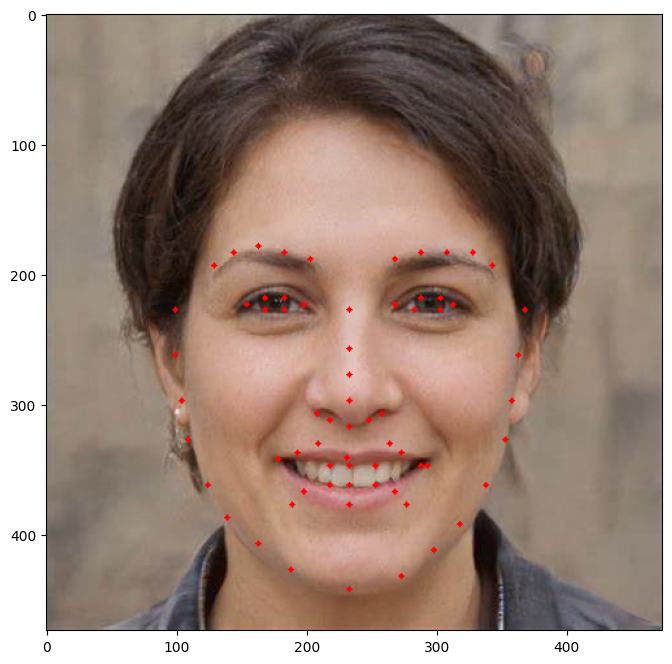

In [68]:
# output = io.imshow(preds[0])
output_open = input.copy()
if open_laugh(landmarks):
    for face in open_laugh(landmarks)[0]:
        x, y = face  # 提取坐标
        output_open = cv2.circle(output_open, (int(x), int(y)), radius=2, color=(255, 0, 0), thickness=-1)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(output_open)
plt.show()

In [ ]:
# output = io.imshow(preds[0])
output_close = input.copy()
if close_mouth(landmarks):
    for face in close_mouth(landmarks)[0]:
        x, y = face  # 提取坐标
        output_close = cv2.circle(output_close, (int(x), int(y)), radius=2, color=(255, 0, 0), thickness=-1)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(output_close)
plt.show()

In [ ]:
a = close_mouth[landmarks]
a

In [ ]:
if preds is not None:
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    # 显示原始图像
    ax.imshow(input)
    
    # 遍历每个检测到的人脸
    for face in preds:
        # 提取 3D 关键点的 x 和 y 坐标
        x_coords = face[:, 0]
        y_coords = face[:, 1]
        
        # 绘制关键点
        ax.scatter(x_coords, y_coords, s=10, c='red', label='Keypoints')
    
    ax.axis('off')
    plt.show()
else:
    print("No landmarks detected.")